# KT 코로나 시각화 경진대회 - 대구와 서울을 중심으로 데이터 비교

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt 
import seaborn as sns

In [2]:
from matplotlib import font_manager, rc
# window >
# font_name = font_manager.FontProperties(fname="/Windows/Fonts/NanumGothicCoding.ttf").get_name()
# gram >
font_name = font_manager.FontProperties(fname="/Windows/Fonts/gulim.ttc").get_name()
rc('font', family=font_name)

## 데이터 불러오기

In [3]:
# COVID DATA
patientinfo=pd.read_csv('./KTdata/COVID_19/PatientInfo_20200717.csv')
case=pd.read_csv('./KTdata/COVID_19/Case.csv')
policy=pd.read_csv('./KTdata/COVID_19/Policy.csv')
region=pd.read_csv('./KTdata/COVID_19/Region.csv')
time=pd.read_csv('./KTdata/COVID_19/Time.csv')
timeage=pd.read_csv('./KTdata/COVID_19/TimeAge.csv')
timegender=pd.read_csv('./KTdata/COVID_19/TimeGender.csv')
timeprovince=pd.read_csv('./KTdata/COVID_19/TimeProvince.csv')
# KT DATA
fpopl=pd.read_csv('./KTdata/fpopl.csv')
adstrd=pd.read_csv('./KTdata/adstrd_master.csv')
card=pd.read_csv('./KTdata/card.csv')
delivery=pd.read_csv('./KTdata/delivery.csv')
index=pd.read_csv('./KTdata/index.csv')

## 파일별로 데이터 확인하고 시각화 해보기

1. COVID_Data1 - PatientInfo

In [39]:
patientinfo

,patient_id,sex,age,country,province,city,infection_case,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,male,50s,Korea,서울,강서구,overseas inflow,NaN,75.0,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,male,30s,Korea,서울,중랑구,overseas inflow,NaN,31.0,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,male,50s,Korea,서울,종로구,contact with patient,2002000001,17.0,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,male,20s,Korea,서울,마포구,overseas inflow,NaN,9.0,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,female,20s,Korea,서울,성북구,contact with patient,1000000002,2.0,NaN,2020-01-31,2020-02-24,NaN,released
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5159,7000000015,female,30s,Korea,제주도,제주도,overseas inflow,NaN,25.0,NaN,2020-05-30,2020-06-13,NaN,released
5160,7000000016,NaN,NaN,Korea,제주도,제주도,overseas inflow,NaN,NaN,NaN,2020-06-16,2020-06-24,NaN,released
5161,7000000017,NaN,NaN,Bangladesh,제주도,제주도,overseas inflow,NaN,72.0,NaN,2020-06-18,NaN,NaN,isolated
5162,7000000018,NaN,NaN,Bangladesh,제주도,제주도,overseas inflow,NaN,NaN,NaN,2020-06-18,NaN,NaN,isolated


In [41]:
patientinfo.infection_case.value_counts()

contact with patient                             1610
overseas inflow                                   839
etc                                               703
Itaewon Clubs                                     162
Richway                                           128
Guro-gu Call Center                               112
Shincheonji Church                                107
Coupang Logistics Center                           80
Yangcheon Table Tennis Club                        44
Day Care Center                                    43
SMR Newly Planted Churches Group                   36
Onchun Church                                      33
Bonghwa Pureun Nursing Home                        31
gym facility in Cheonan                            30
Ministry of Oceans and Fisheries                   28
Wangsung Church                                    24
Cheongdo Daenam Hospital                           21
Dongan Church                                      17
Eunpyeong St. Mary's Hospita

infection_case에 신천지교회 수가 맞지 않음. 데이터 양도 적고 정확하지 않으므로 사용할 필요 없어 보임

2. COVID_Data1 - Case

In [11]:
case

,case_id,province,city,group,infection_case,confirmed,latitude,longitude
0,1000001,서울,용산구,True,Itaewon Clubs,139,37.538621,126.992652
1,1000002,서울,관악구,True,Richway,119,37.48208,126.901384
2,1000003,서울,구로구,True,Guro-gu Call Center,95,37.508163,126.884387
3,1000004,서울,양천구,True,Yangcheon Table Tennis Club,43,37.546061,126.874209
4,1000005,서울,도봉구,True,Day Care Center,43,37.679422,127.044374
...,...,...,...,...,...,...,...,...
169,6100012,경상남도,-,False,etc,20,-,-
170,7000001,제주도,-,False,overseas inflow,14,-,-
171,7000002,제주도,-,False,contact with patient,0,-,-
172,7000003,제주도,-,False,etc,4,-,-


In [51]:
case_sd = case[(case['province']=='대구') | (case['province']=='서울')]

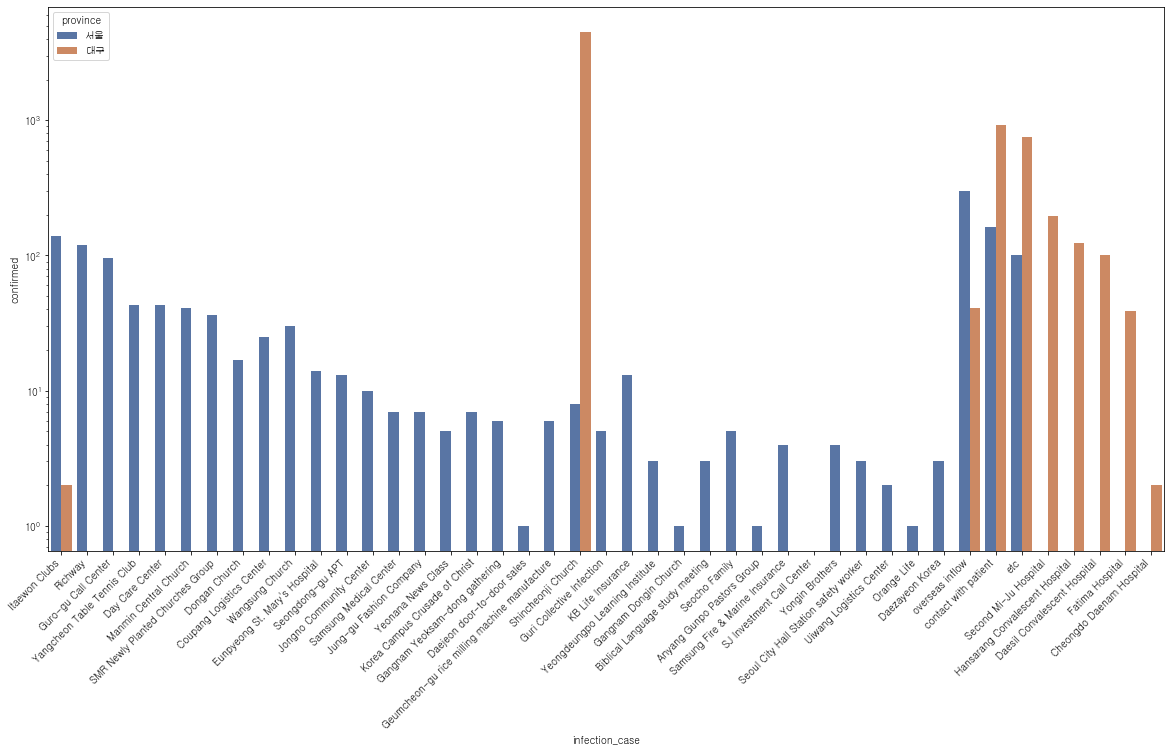

In [85]:
plt.figure(figsize = (20,10))
sns.barplot(data = case_sd, x = 'infection_case', y = 'confirmed', hue='province', palette="deep")
plt.xticks(rotation=45, horizontalalignment='right')
plt.yscale('log')

3. COVID_Data1 - Policy

In [13]:
policy

,policy_id,country,type,gov_policy,detail,start_date,end_date
0,1,Korea,Alert,Infectious Disease Alert Level,Level 1 (Blue),2020-01-03,2020-01-19
1,2,Korea,Alert,Infectious Disease Alert Level,Level 2 (Yellow),2020-01-20,2020-01-27
2,3,Korea,Alert,Infectious Disease Alert Level,Level 3 (Orange),2020-01-28,2020-02-22
3,4,Korea,Alert,Infectious Disease Alert Level,Level 4 (Red),2020-02-23,NaN
4,5,Korea,Immigration,Special Immigration Procedure,from China,2020-02-04,NaN
...,...,...,...,...,...,...,...
56,57,Korea,Transformation,Logistics center,On-site inspection of major logistics faciliti...,2020-05-29,2020-06-11
57,58,Korea,Transformation,Wearing of masks,"Mandatory wearing of passenger mask domestic, ...",2020-05-27,NaN
58,59,Korea,Transformation,Wearing of masks,Drivers such as buses and taxis can refuse to ...,2020-05-26,NaN
59,60,Korea,Technology,KI-Pass: Korea Internet - Pass,new quick response (QR) code system this week ...,2020-06-10,NaN


In [87]:
policy.gov_policy.value_counts()

Special Immigration Procedure                    13
School Opening with Online Class                 10
Emergency Use Authorization of Diagnostic Kit     5
Infectious Disease Alert Level                    4
School Opening Delay                              4
Social Distancing Campaign                        4
Mask Distribution                                 2
Drive-Through Screening Center                    2
Wearing of masks                                  2
Logistics center                                  1
Mandatory 14-day Self-Quarantine                  1
Self-Diagnosis App                                1
Open Data                                         1
Close karaoke                                     1
Extends Tightened Quarantine Measures             1
School Closure                                    1
Electronic Wristbands                             1
KI-Pass: Korea Internet - Pass                    1
local government Administrative orders            1
Mandatory Se

정책관련 데이터는 사용할 필요 없을 것 같음

4. COVID_Data1 - Region

In [15]:
region

,code,province,city,latitude,longitude,elementary_school_count,kindergarten_count,university_count,academy_ratio,elderly_population_ratio,elderly_alone_ratio,nursing_home_count
0,10000,서울,서울,37.566953,126.977977,607,830,48,1.44,15.38,5.8,22739
1,10010,서울,강남구,37.518421,127.047222,33,38,0,4.18,13.17,4.3,3088
2,10020,서울,강동구,37.530492,127.123837,27,32,0,1.54,14.55,5.4,1023
3,10030,서울,강북구,37.639938,127.025508,14,21,0,0.67,19.49,8.5,628
4,10040,서울,강서구,37.551166,126.849506,36,56,1,1.17,14.39,5.7,1080
...,...,...,...,...,...,...,...,...,...,...,...,...
239,61160,경상남도,하만,35.272481,128.406540,16,20,0,1.19,23.74,14.7,94
240,61170,경상남도,함양,35.520541,127.725177,13,12,0,1.01,32.65,20.9,83
241,61180,경상남도,합천,35.566702,128.165870,17,15,0,0.71,38.44,24.7,96
242,70000,제주도,제주도,33.488936,126.500423,113,123,4,1.53,15.10,6.4,1245


In [89]:
region_sd = region[(region['city']=='대구') | (region['city']=='서울')]
region_sd

,code,province,city,latitude,longitude,elementary_school_count,kindergarten_count,university_count,academy_ratio,elderly_population_ratio,elderly_alone_ratio,nursing_home_count
0,10000,서울,서울,37.566953,126.977977,607,830,48,1.44,15.38,5.8,22739
43,12000,대구,대구,35.872150,128.601783,229,355,11,1.62,15.78,7.5,5083


경도 위도 사용하여 지도 그래프로 시각화 하면 좋을 것 같음

5. COVID_Data1 - Time

In [16]:
time

,date,time,test,negative,confirmed,released,deceased
0,2020-01-20,16,1,0,1,0,0
1,2020-01-21,16,1,0,1,0,0
2,2020-01-22,16,4,3,1,0,0
3,2020-01-23,16,22,21,1,0,0
4,2020-01-24,16,27,25,2,0,0
...,...,...,...,...,...,...,...
158,2020-06-26,0,1232315,1200885,12602,11172,282
159,2020-06-27,0,1243780,1211261,12653,11317,282
160,2020-06-28,0,1251695,1219975,12715,11364,282
161,2020-06-29,0,1259954,1228698,12757,11429,282


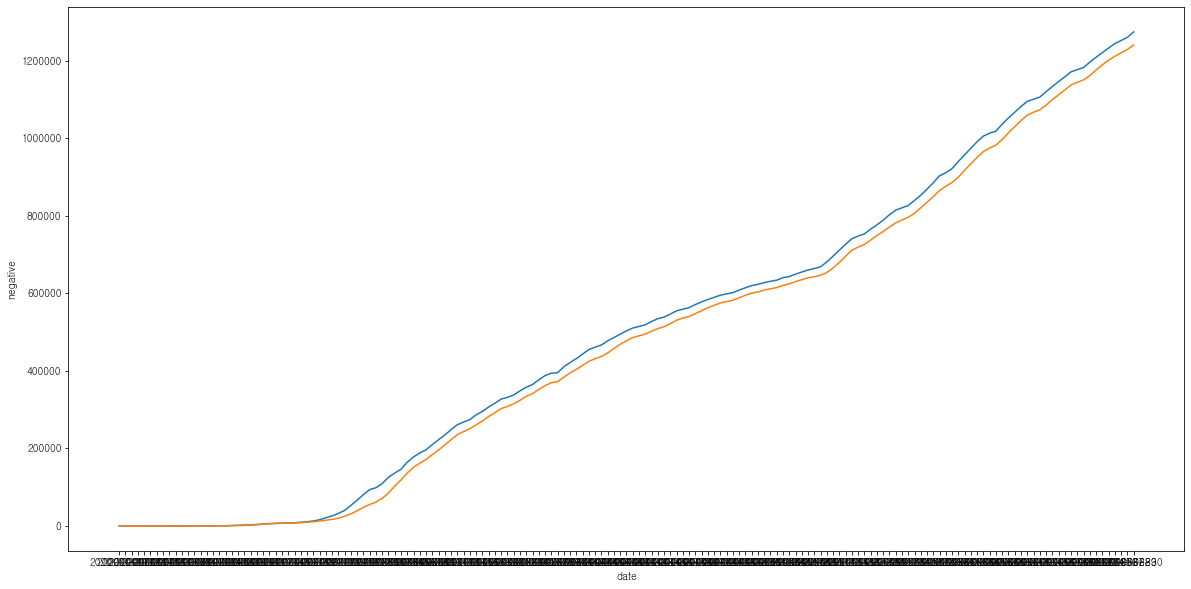

In [96]:
plt.figure(figsize = (20,10))
sns.lineplot(data = time, x = 'date', y = 'test')
sns.lineplot(data = time, x = 'date', y = 'negative')

지역별 비교가 아니기 때문에 사용할 필요 없을 것 같음

6. COVID_Data1 - Time age & gender

In [17]:
timeage

,date,time,age,confirmed,deceased
0,2020-03-02,0,0s,32,0
1,2020-03-02,0,10s,169,0
2,2020-03-02,0,20s,1235,0
3,2020-03-02,0,30s,506,1
4,2020-03-02,0,40s,633,1
...,...,...,...,...,...
1084,2020-06-30,0,40s,1681,3
1085,2020-06-30,0,50s,2286,15
1086,2020-06-30,0,60s,1668,41
1087,2020-06-30,0,70s,850,82


In [19]:
timegender

,date,time,sex,confirmed,deceased
0,2020-03-02,0,male,1591,13
1,2020-03-02,0,female,2621,9
2,2020-03-03,0,male,1810,16
3,2020-03-03,0,female,3002,12
4,2020-03-04,0,male,1996,20
...,...,...,...,...,...
237,2020-06-28,0,female,7265,131
238,2020-06-29,0,male,5470,151
239,2020-06-29,0,female,7287,131
240,2020-06-30,0,male,5495,151


나이와 성별 데이터는 지역별로 구분된 것이 아니기 때문에 사용할 필요 없을 것 같음

7. COVID_Data1 - Timeprovince

In [20]:
timeprovince

,date,time,province,confirmed,released,deceased
0,2020-01-20,16,서울,0,0,0
1,2020-01-20,16,부산,0,0,0
2,2020-01-20,16,대구,0,0,0
3,2020-01-20,16,인천,1,0,0
4,2020-01-20,16,광주,0,0,0
...,...,...,...,...,...,...
2766,2020-06-30,0,전라북도,27,21,0
2767,2020-06-30,0,전라남도,24,19,0
2768,2020-06-30,0,경상북도,1389,1328,54
2769,2020-06-30,0,경상남도,134,128,0


In [97]:
timeprov_sd = timeprovince[(timeprovince['province']=='대구') | (timeprovince['province']=='서울')]

In [112]:
# date에서 month만 추출
def grap_month(data):
    data = str(data)
    return str(data[6:7])+'월'

timeprov_sd['month'] = timeprov_sd['date'].apply(lambda x: grap_month(x))

C:\Users\j9408\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [113]:
timeprov_sd

,date,time,province,confirmed,released,deceased,month
0,2020-01-20,16,서울,0,0,0,1월
2,2020-01-20,16,대구,0,0,0,1월
17,2020-01-21,16,서울,0,0,0,1월
19,2020-01-21,16,대구,0,0,0,1월
34,2020-01-22,16,서울,0,0,0,1월
...,...,...,...,...,...,...,...
2722,2020-06-28,0,대구,6904,6700,189,6월
2737,2020-06-29,0,서울,1305,942,7,6월
2739,2020-06-29,0,대구,6906,6700,189,6월
2754,2020-06-30,0,서울,1312,985,7,6월


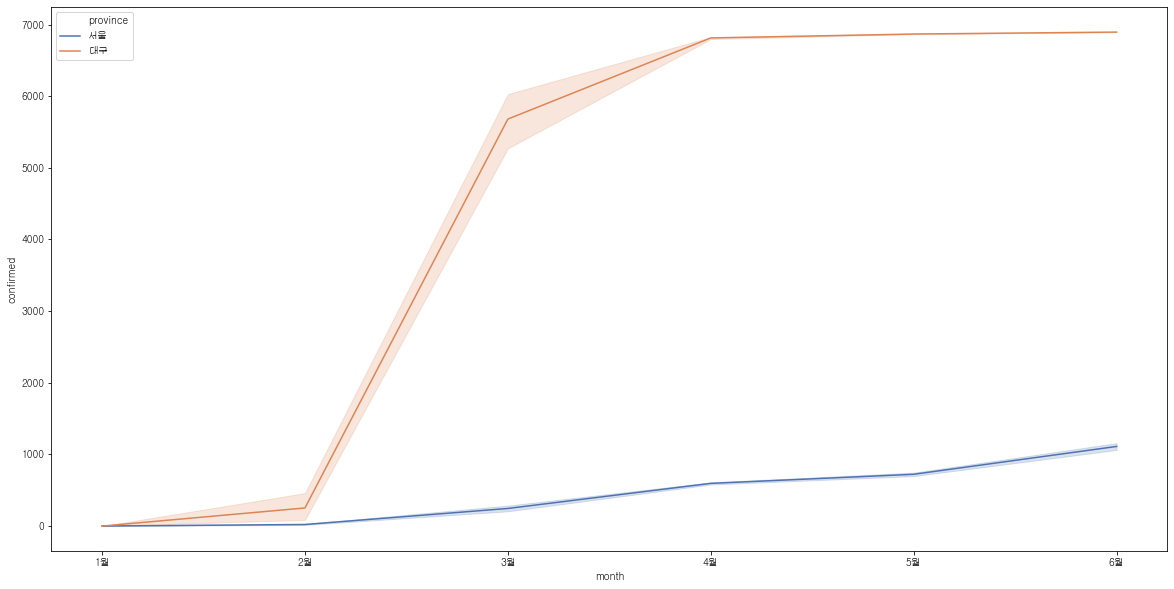

In [119]:
plt.figure(figsize = (20,10))
sns.lineplot(data = timeprov_sd, x ='month', y ='confirmed', hue='province', palette="deep")

대구 신천지 확진자 발생으로 2월 이후 확진자 수가 급증한 것으로 보임\
서울은 비교적 완만한 증가 추세를 보인다.

---

8. COVID_Data2 - adstrd 행정동 코드 확인

In [131]:
adstrd.adstrd_code = adstrd.adstrd_code.astype(int)
adstrd

,adstrd_code,adstrd_nm,brtc_nm,signgu_nm
0,11110515,청운효자동,서울특별시,종로구
1,11110530,사직동,서울특별시,종로구
2,11110540,삼청동,서울특별시,종로구
3,11110550,부암동,서울특별시,종로구
4,11110560,평창동,서울특별시,종로구
...,...,...,...,...
3488,50130580,서홍동,제주특별자치도,서귀포시
3489,50130590,대륜동,제주특별자치도,서귀포시
3490,50130600,대천동,제주특별자치도,서귀포시
3491,50130610,중문동,제주특별자치도,서귀포시


In [132]:
seoul = adstrd[adstrd['brtc_nm']=='서울특별시']
seoul

,adstrd_code,adstrd_nm,brtc_nm,signgu_nm
0,11110515,청운효자동,서울특별시,종로구
1,11110530,사직동,서울특별시,종로구
2,11110540,삼청동,서울특별시,종로구
3,11110550,부암동,서울특별시,종로구
4,11110560,평창동,서울특별시,종로구
...,...,...,...,...
420,11740650,성내2동,서울특별시,강동구
421,11740660,성내3동,서울특별시,강동구
422,11740685,길동,서울특별시,강동구
423,11740690,둔촌1동,서울특별시,강동구


In [133]:
daegu = adstrd[adstrd['brtc_nm']=='대구광역시']
daegu

,adstrd_code,adstrd_nm,brtc_nm,signgu_nm
630,27110517,동인동,대구광역시,중구
631,27110545,삼덕동,대구광역시,중구
632,27110565,성내1동,대구광역시,중구
633,27110575,성내2동,대구광역시,중구
634,27110585,성내3동,대구광역시,중구
...,...,...,...,...
764,27710262,옥포읍,대구광역시,달성군
765,27710265,현풍읍,대구광역시,달성군
766,27710310,가창면,대구광역시,달성군
767,27710330,하빈면,대구광역시,달성군


서울 행정구역 425개, 대구 행정구역 139개 \
서울은 코드번호가 11로 시작, 대구는 27로 시작하는 것을 알 수 있다

9. COVID_Data2 - fpopl

In [27]:
fpopl

,base_ymd,tmzon_se_code,sexdstn_se_code,agrde_se_code,adstrd_code,popltn_cascnt
0,20200101,0,M,age_00,11650560,15
1,20200101,0,M,age_00,11590620,6
2,20200101,0,M,age_00,11560710,4
3,20200101,0,M,age_00,11470680,12
4,20200101,0,M,age_00,11350665,6
...,...,...,...,...,...,...
47546438,20200616,23,F,age_70,11500593,38
47546439,20200616,23,M,age_70,11350624,28
47546440,20200616,23,M,age_70,11305534,47
47546441,20200616,23,F,age_70,11500604,50


10. COVID_Data2 - card

In [28]:
card

,receipt_dttm,adstrd_code,adstrd_nm,mrhst_induty_cl_code,mrhst_induty_cl_nm,selng_cascnt,salamt
0,20200104,1174066000,성내3동,7041,약국,463,5843230
1,20200104,1174066000,성내3동,7022,치과의원,33,7835550
2,20200104,1174066000,성내3동,7021,한의원,53,4589800
3,20200104,1174066000,성내3동,7020,의원,339,9267240
4,20200104,1174066000,성내3동,6110,자동차정비,19,4441000
...,...,...,...,...,...,...,...
3713947,20200614,1121586000,구의2동,4004,대형할인점,136,1195640
3713948,20200614,1121584700,자양4동,9010,인테 리어,2,13100
3713949,20200614,1162052500,보라매동,6140,주 차 장,2,14500
3713950,20200614,1135056000,월계1동,9998,기타전문점,1,38000


11. COVID_Data2 - delivery

In [30]:
delivery

,SERIAL_NUMBER,PROCESS_DT,DLVR_RQESTER_ID,DLVR_REQUST_STTUS_VALUE,DLVR_RCEPT_CMPNY_ID,DLVR_STORE_ID,DLVR_STORE_INDUTY_NM,DLVR_STORE_LEGALDONG_CODE,DLVR_STORE_SIDO,DLVR_STORE_SIGUNGU,...,DLVR_MAN_ID,DLVR_AMOUNT,CALL_RLAY_FEE_AMOUNT,GOODS_AMOUNT,SETLE_KND_VALUE,SETLE_CARD_CN,DLVR_RCEPT_TIME,DLVR_CARALC_TIME,DLVR_COMPT_TIME,DLVR_CANCL_TIME
0,4577985,2020-01-01,C000035,1,C000035,S0032342,치킨,4812710600,경상남도,창원시 마산회원구,...,D0005271,4290,300,25000,1,승인:비씨카드사,2020-01-01 00:15:49,2020-01-01 00:21:38,2020-01-01 00:41:37,NaN
1,4577986,2020-01-01,C000237,1,C000237,S0021847,찜탕,4121010200,경기도,광명시,...,D0003269,4800,200,49000,2,NaN,2020-01-01 01:12:14,2020-01-01 01:21:41,2020-01-01 01:31:44,NaN
2,4577988,2020-01-01,C000129,1,C000129,S0025740,치킨,1138010400,서울특별시,은평구,...,D0001536,3300,300,23000,3,승인:,2020-01-01 00:01:14,2020-01-01 00:01:47,2020-01-01 00:18:47,NaN
3,4577989,2020-01-01,C000029,1,C000043,S0039634,한식,4115010100,경기도,의정부시,...,D0005061,4500,300,20000,2,NaN,2020-01-01 01:01:34,2020-01-01 01:28:06,2020-01-01 01:36:48,NaN
4,4577991,2020-01-01,C000130,1,C000130,S0002237,한식,4128112800,경기도,고양시 덕양구,...,D0005215,6500,300,32000,2,NaN,2020-01-01 01:05:06,2020-01-01 01:08:01,2020-01-01 01:29:00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5158319,10672688,2020-06-21,C000312,1,C000312,S0029529,야식,4125010200,경기도,동두천시,...,D0013004,3000,500,26000,1,승인:하나카드,2020-06-21 22:48:22,2020-06-21 22:48:37,2020-06-21 23:07:47,NaN
5158320,10672689,2020-06-21,C000026,1,C000026,S0026242,야식,1132010800,서울특별시,도봉구,...,D0006251,3600,55,22000,2,NaN,2020-06-21 22:57:15,2020-06-21 22:58:00,2020-06-21 23:18:20,NaN
5158321,10672690,2020-06-21,C000130,1,C000130,S0042234,야식,4128112300,경기도,고양시 덕양구,...,D0012754,3000,300,17000,2,NaN,2020-06-21 22:55:08,2020-06-21 22:55:22,2020-06-21 23:14:45,NaN
5158322,10672691,2020-06-21,C000237,1,C000237,S0021766,족발/보쌈,4121010200,경기도,광명시,...,D0004485,3630,200,53700,1,승인:비씨카드사,2020-06-21 23:10:38,2020-06-21 23:11:03,2020-06-21 23:25:10,NaN


In [4]:
deli_sd = delivery[(delivery['DLVR_STORE_SIDO']=='대구광역시') | (delivery['DLVR_STORE_SIDO']=='서울특별시')]

In [5]:
# date에서 month만 추출
def grap_month(data):
    data = str(data)
    return str(data[6:7])+'월'

deli_sd['month'] = deli_sd['PROCESS_DT'].apply(lambda x: grap_month(x))
deli_sd

C:\Users\j9408\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,SERIAL_NUMBER,PROCESS_DT,DLVR_RQESTER_ID,DLVR_REQUST_STTUS_VALUE,DLVR_RCEPT_CMPNY_ID,DLVR_STORE_ID,DLVR_STORE_INDUTY_NM,DLVR_STORE_LEGALDONG_CODE,DLVR_STORE_SIDO,DLVR_STORE_SIGUNGU,...,DLVR_AMOUNT,CALL_RLAY_FEE_AMOUNT,GOODS_AMOUNT,SETLE_KND_VALUE,SETLE_CARD_CN,DLVR_RCEPT_TIME,DLVR_CARALC_TIME,DLVR_COMPT_TIME,DLVR_CANCL_TIME,month
2,4577988,2020-01-01,C000129,1,C000129,S0025740,치킨,1138010400,서울특별시,은평구,...,3300,300,23000,3,승인:,2020-01-01 00:01:14,2020-01-01 00:01:47,2020-01-01 00:18:47,NaN,1월
6,4577994,2020-01-01,C000049,1,C000049,S0022461,분식,1153010800,서울특별시,구로구,...,3800,300,28000,2,NaN,2020-01-01 01:27:00,2020-01-01 01:27:47,2020-01-01 01:41:45,NaN,1월
8,4577996,2020-01-01,C000104,1,C000101,S0021988,치킨,1156013300,서울특별시,영등포구,...,4800,200,17000,1,승인:KB국민카드,2020-01-01 00:51:49,2020-01-01 00:52:12,2020-01-01 01:23:41,NaN,1월
14,4578003,2020-01-01,C000010,1,C000010,S0000458,치킨,2726011100,대구광역시,수성구,...,3000,300,18000,1,승인:롯데카드사,2020-01-01 00:07:10,2020-01-01 00:07:25,2020-01-01 00:24:14,NaN,1월
24,4578014,2020-01-01,C000101,1,C000104,S0021942,치킨,1156013200,서울특별시,영등포구,...,3900,300,19000,2,NaN,2020-01-01 00:02:53,2020-01-01 00:16:01,2020-01-01 00:42:53,NaN,1월
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5158279,10672642,2020-06-21,C000049,1,C000237,S0022444,한식,1153010600,서울특별시,구로구,...,3300,300,18900,2,NaN,2020-06-21 23:04:02,2020-06-21 23:08:38,2020-06-21 23:18:13,NaN,6월
5158298,10672664,2020-06-21,C000209,1,C000210,S0019627,배달전문업체,1154510200,서울특별시,금천구,...,3300,200,21900,2,NaN,2020-06-21 23:37:27,2020-06-21 23:38:01,2020-06-21 23:48:26,NaN,6월
5158308,10672675,2020-06-21,C000032,1,C000447,S0000583,한식,2771025628,대구광역시,달성군,...,3000,300,26500,2,NaN,2020-06-21 23:01:54,2020-06-21 23:02:20,2020-06-21 23:05:10,NaN,6월
5158320,10672689,2020-06-21,C000026,1,C000026,S0026242,야식,1132010800,서울특별시,도봉구,...,3600,55,22000,2,NaN,2020-06-21 22:57:15,2020-06-21 22:58:00,2020-06-21 23:18:20,NaN,6월


In [7]:
deli_sd.DLVR_REQUST_STTUS_VALUE.value_counts()

1    842417
2     12147
3         2
4         1
Name: DLVR_REQUST_STTUS_VALUE, dtype: int64

1은 완료된 건이고 나머지는 취소,사고,문의이므로 완료된 건으로만 확인하겠음

In [10]:
deli_sd = deli_sd[deli_sd.DLVR_REQUST_STTUS_VALUE==1]

In [12]:
deli_sd['counts'] = 1
deli_gr = deli_sd.groupby(['DLVR_STORE_SIDO','month'])[['GOODS_AMOUNT','counts']].sum().reset_index(drop = False)

C:\Users\j9408\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [13]:
deli_gr

,DLVR_STORE_SIDO,month,GOODS_AMOUNT,counts
0,대구광역시,1월,365256052,17806
1,대구광역시,2월,308799150,15279
2,대구광역시,3월,149367200,7930
3,대구광역시,4월,140110000,7458
4,대구광역시,5월,189103650,9817
5,대구광역시,6월,89123150,4671
6,서울특별시,1월,3052372755,134861
7,서울특별시,2월,3209041058,143218
8,서울특별시,3월,3424283360,151942
9,서울특별시,4월,3175885857,140996


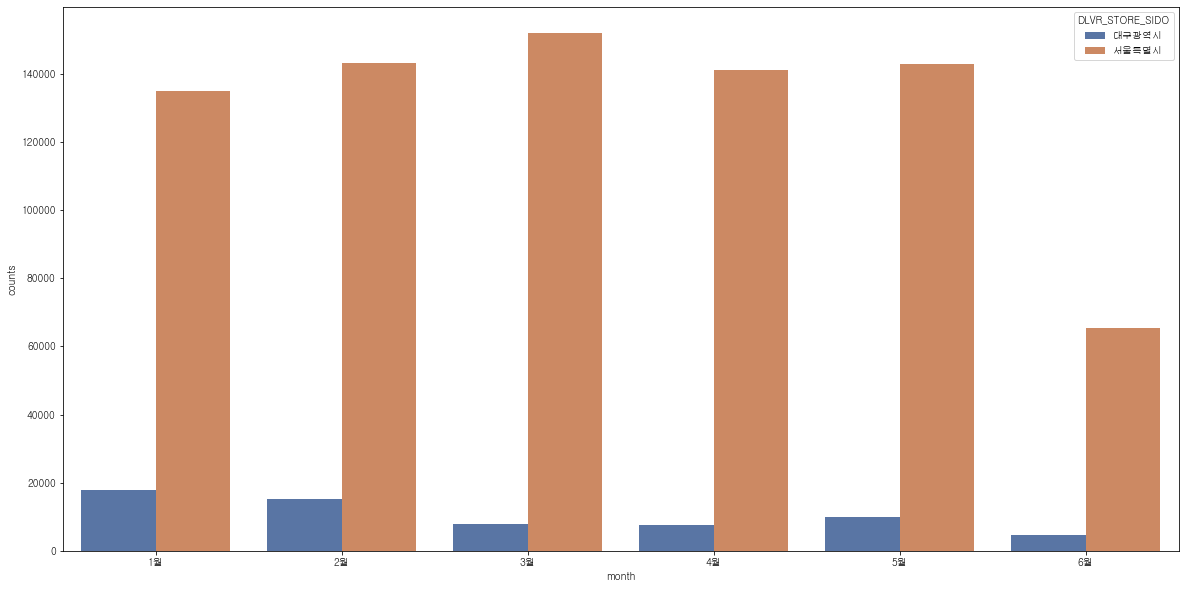

In [14]:
plt.figure(figsize = (20,10))
sns.barplot(data = deli_gr, x ='month', y ='counts', hue='DLVR_STORE_SIDO', palette="deep")
plt.show()

In [31]:
deli_sd.groupby(['DLVR_STORE_SIDO','DLVR_STORE_INDUTY_NM'])['DLVR_AMOUNT','counts'].sum()

C:\Users\j9408\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


DLVR_AMOUNT  counts
DLVR_STORE_SIDO DLVR_STORE_INDUTY_NM                     
대구광역시           돈까스/일식                    9583150    2836
                분식                       35620900    9777
                심부름                         24000       8
                아시안/양식                    7642750    2075
                야식                         179000      53
                족발/보쌈                     4232050    1110
                중식                        5048000    1663
                찜탕                         797000     210
                치킨                        6861650    2037
                카페/디저트                  112479800   36404
                피자                         335600     111
                한식                       23787670    6677
서울특별시           도시락                      13410100    3691
                돈까스/일식                   83165680   22201
                배달전문업체                    4096000    1122
                분식                      404632160  109634
                아시안/양식                   89388840   23045
                야식                      123546430   31298
                족발/보쌈                   224731380   59204
                중식                       77936190   21550
                찜탕                       47254230   12497
                치킨                      795219770  211342
                카페/디저트                  273239230   78672
                패스트푸드                   320639430   92140
                피자                      155572510   41722
                한식                      220717772   58640
                회                        48166500   12698

In [27]:
deli_sd.SETLE_KND_VALUE.value_counts()

2    604565
1    185687
3     52165
Name: SETLE_KND_VALUE, dtype: int64

12. COVID_Data2 - index

In [31]:
index

,period,catl,catm,age,gender,sido,sigungu,cgi
0,201901,건강/의료용품,건강관리용품,20,F,서울,관악구,115.374642
1,201901,건강/의료용품,건강관리용품,20,F,서울,광진구,119.596454
2,201901,건강/의료용품,건강관리용품,20,F,서울,도봉구,156.992847
3,201901,건강/의료용품,건강관리용품,20,F,서울,동작구,58.342726
4,201901,건강/의료용품,건강관리용품,20,F,서울,마포구,145.147595
...,...,...,...,...,...,...,...,...
127520,202005,화장품,화장품,all,all,서울,강서구,51.365660
127521,202005,화장품,화장품,all,all,서울,관악구,61.997865
127522,202005,화장품,화장품,all,all,서울,금천구,82.198402
127523,202005,화장품,화장품,all,all,서울,도봉구,35.875600
